In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from math import floor
import cca.cov_util

def disp_cov(cov, title=None):
    s = np.max(np.abs(cov))
    plt.imshow(cov, vmin=-s, vmax=s, cmap="RdGy")
    plt.colorbar()
    plt.title(title, fontsize=16)


-1.497130646140652


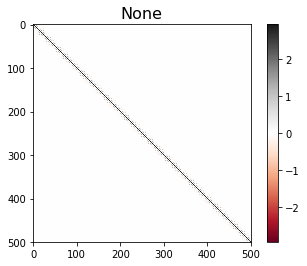

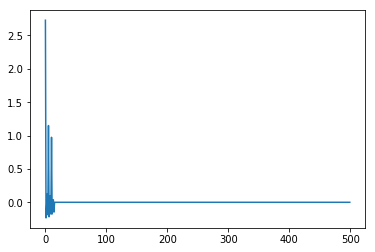

In [57]:
N = 5
T = 100
cov = np.zeros((N*T, N*T))

V_1 = scipy.stats.ortho_group.rvs(N)
V_2 = scipy.stats.ortho_group.rvs(N)
spectrum = np.exp(-np.arange(N)/3)
cov_spatial_1 = V_1.dot(np.diag(spectrum)).dot(V_1.T)
cov_spatial_2 = V_2.dot(np.diag(spectrum)).dot(V_2.T)

t = np.arange(T).reshape((T, 1))
dt_mat = np.abs(t - t.T)

cov_temporal_1 = np.exp(-(dt_mat/7)**2)
cov_temporal_2 = np.exp(-(dt_mat/3)**2)

cov = np.kron(cov_temporal_1, cov_spatial_1) +  np.kron(cov_temporal_2, cov_spatial_2)

for i in range(N*T):
    for j in range(N*T):
        if abs(i - j) > 2:
            cov[i*N:(i+1)*N, j*N:(j+1)*N] = 0

min_eig = np.min(np.linalg.eigvalsh(cov))
print(min_eig)
if min_eig < 0:
    cov += np.eye(N*T)*(-min_eig + 1e-2)
            
disp_cov(cov)
plt.show()

plt.plot(cov[0, :])
plt.show()

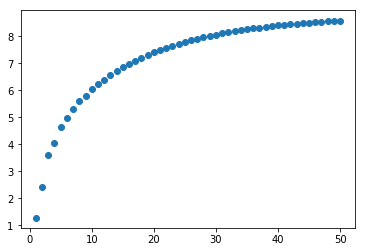

In [58]:
T_vals = np.arange(T//2) + 1
pi_vals = np.zeros(T//2)
for T_idx in range(len(T_vals)):
    T_pi = T_vals[T_idx]
    pi_vals[T_idx] = cca.cov_util.calc_pi_from_cov(cov[:2*N*T_pi, :2*N*T_pi])
    
k = 50
plt.scatter(T_vals[:k], pi_vals[:k])